# Movie Recommendation System

In this project, we'll be looking to create a movie recommendation system based on user ratings system. We've collected datasets with over 100000 users who've rated movies of different genres. The system will detect movies similar to the movies which have been rated by the user.

First, we'll import the pandas and numpy libraries. We have two separate datasets involving the movie id, title and the user ifd and ratings columns, which we'll merge together into one dataframe.

In [1]:
import pandas as pd
import numpy as np

movcols = ['movieId', 'title']
movies = pd.read_csv('movies.csv', usecols = movcols)

ratcols = ['userId', 'movieId', 'rating']
ratings = pd.read_csv('ratings.csv', usecols = ratcols)

ratings = pd.merge(movies, ratings)

ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


Now, we'll use matplotlib and seaborn to visualize the countplot graph of the ratings to grasp the overall pattern of ratings given to the movies by all the users.

In [2]:
ratingsdf = pd.DataFrame(ratings.groupby('title')['rating'].mean())

ratingsdf.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [3]:
ratingsdf['numberofratings'] = pd.DataFrame(ratings.groupby('title')['rating'].count())

ratingsdf.head()

,rating,numberofratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


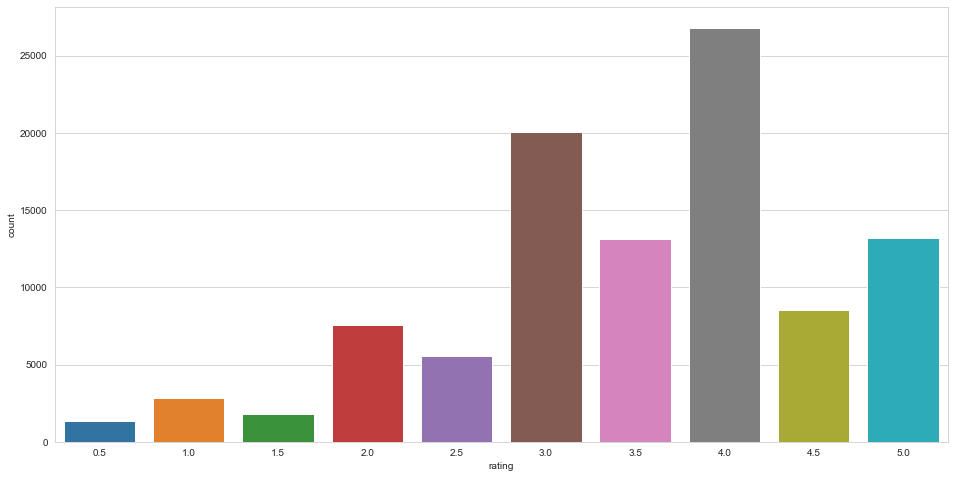

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='rating',data=ratings)

plt.show()

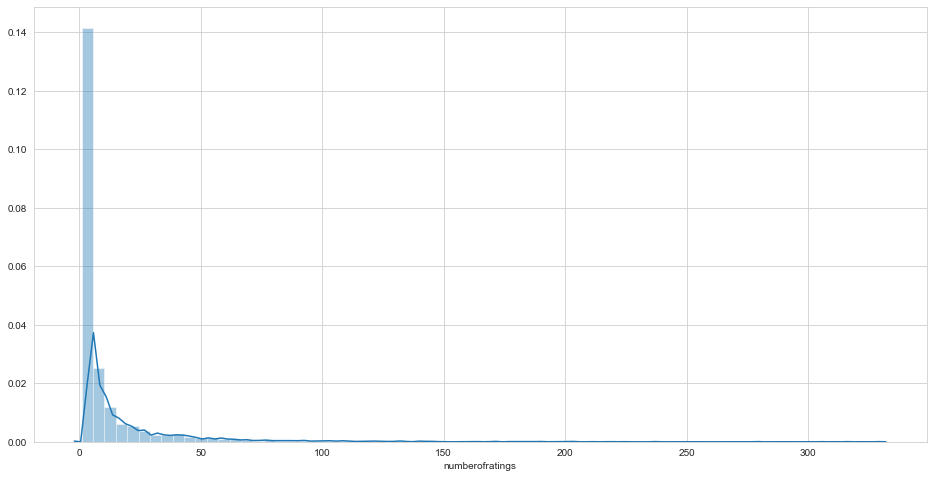

In [7]:
plt.figure(figsize=(16,8))
sns.distplot(ratingsdf['numberofratings'],bins=70)

plt.show()

From the graph above, we see that most of the movies in the dataframe have gotten a rating of 3.0 and above. The highest amount of movies belong in the 4.0 rating category, followed by 3.0. This suggests that most films in the database have gotten good to great reviews by the user.

Now, we'll create another dataframe which will have the user ids as the index and the movie titles as the column names. The user ratings will be the values of that dataframe.

In [2]:
userRatings = ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

userRatings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we'll use the pandas correlation function to find similarities between the movies in the dataframe. We'll filter out the movies which have only been rated by a handful number of users to give us the most effective of results.

In [3]:
ratingCorr = userRatings.corr(method='pearson', min_periods=150)

ratingCorr.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll now take a user from the dataset as an example, let's say user id number 10. We'll take a look at his rated movies list.

In [7]:
sampRatings = userRatings.loc[10].dropna()

sampRatings

title
27 Dresses (2008)                  3.0
300 (2007)                         3.0
50 First Dates (2004)              3.5
About Time (2013)                  4.0
About a Boy (2002)                 3.5
                                  ... 
What a Girl Wants (2003)           3.0
When Harry Met Sally... (1989)     3.0
White House Down (2013)            4.0
Wolf of Wall Street, The (2013)    1.0
Yes Man (2008)                     0.5
Name: 10, Length: 140, dtype: float64

Based on the list, we'll try to use the correlation function to find similar movies to the list. We'll append all the similar movies to a series called suggestions.

In [8]:
suggestions = pd.Series()

for i in range(0, len(sampRatings.index)):
    sim = ratingCorr[sampRatings.index[i]].dropna()
    
    sim = sim.apply(lambda x: x * sampRatings[i])
    
    suggestions = suggestions.append(sim)
    
print()
print('Sorting..')
print()
    
suggestions.sort_values(inplace=True, ascending=False)
suggestions.head(10)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.



Sorting..



Shrek (2001)                                                 4.500000
Aladdin (1992)                                               4.000000
Lord of the Rings: The Two Towers, The (2002)                4.000000
Gladiator (2000)                                             4.000000
Lord of the Rings: The Fellowship of the Ring, The (2001)    4.000000
Lord of the Rings: The Return of the King, The (2003)        4.000000
Lord of the Rings: The Two Towers, The (2002)                3.549206
Lord of the Rings: The Fellowship of the Ring, The (2001)    3.549206
Forrest Gump (1994)                                          3.500000
Lord of the Rings: The Return of the King, The (2003)        3.399756
dtype: float64

The series suggestions contains all the suggested movie names alongside their a combination of their correlation factor and the user's own ratings. Now, we use groupby function to sum up the correlation numbers of the movies and sort them to figure out the most sugguested movies for the user.

In [9]:
suggestions = suggestions.groupby(suggestions.index).sum()

suggestions.sort_values(inplace=True, ascending=False)
suggestions.head(10)

Lord of the Rings: The Fellowship of the Ring, The (2001)    11.051295
Lord of the Rings: The Two Towers, The (2002)                10.835218
Lord of the Rings: The Return of the King, The (2003)        10.685768
Shrek (2001)                                                  4.500000
Aladdin (1992)                                                4.000000
Gladiator (2000)                                              4.000000
Forrest Gump (1994)                                           3.811147
Matrix, The (1999)                                            3.273499
Fight Club (1999)                                             1.910394
Pulp Fiction (1994)                                           1.706536
dtype: float64

Now, we see that the system has suggested movies based on correlated movies related to the movies rated by the user.